### aim: Visualize all GCB outputs, check for holes and compare with last year's

Here is a list of all things requested, first column is variableID (added by TJ to have a clear sequential catalog of the demands)

https://docs.google.com/spreadsheets/d/186mFWSIaPWu7X_RldiGPrPzIuqyNupUR7XwoCBkMaIk/edit#gid=0

Dave's directory, last year's submission: `/gpfs/data/greenocean/GCB/GCB_RECCAP/2022submission`

My directory, this year's submission:
`/gpfs/data/greenocean/GCB/GCB2023/submissionData2023`

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [14]:

TJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/TOM12'
TJdirCAL = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/Tier1/'
TJdirRIV = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/'

### VarID 1-6 (key flag -1)

    1	fgco2_glob
    2	fgco2_reg
    3	intDIC_1994_glob
    4	intDIC_1994_reg
    5	intDIC_2007_glob
    6	intDIC_2007_reg
    


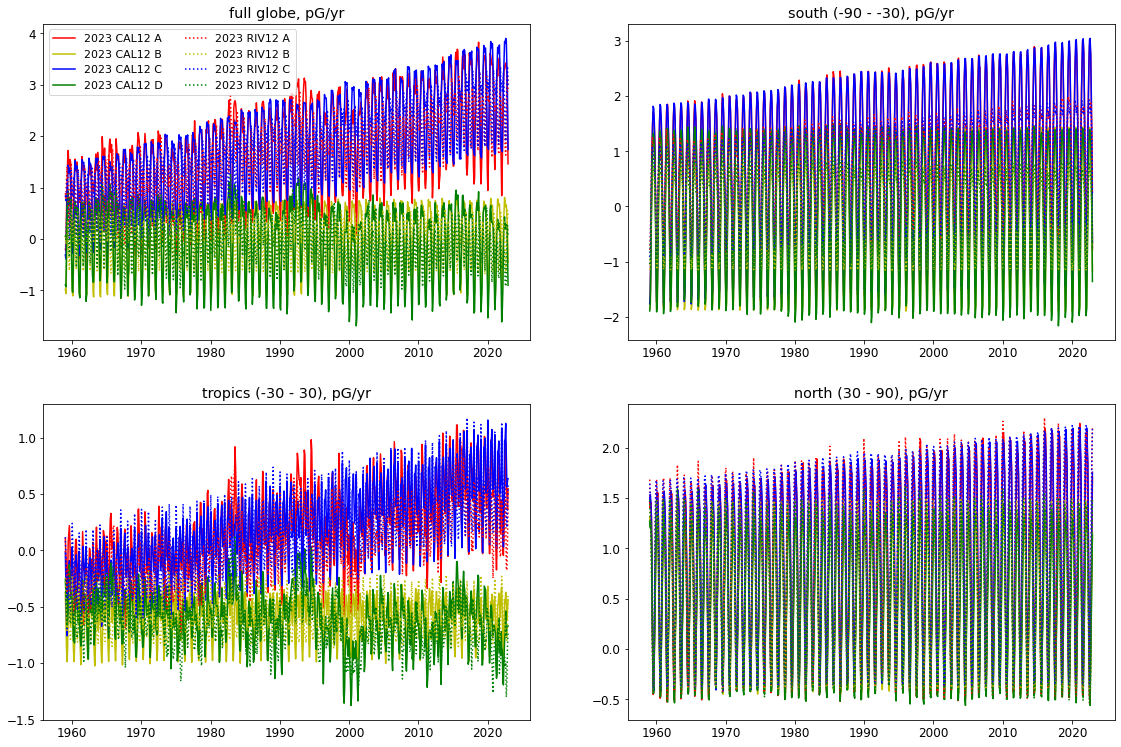

In [17]:
TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_A_*1959-2022*.nc')[0])
TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_B_*1959-2022*.nc')[0])
TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_C_*1959-2022*.nc')[0])
TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_D_*1959-2022*.nc')[0])

TJ_tfil2_A = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_A_*1959-2022*.nc')[0])
TJ_tfil2_B = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_B_*1959-2022*.nc')[0])
TJ_tfil2_C = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_C_*1959-2022*.nc')[0])
TJ_tfil2_D = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_D_*1959-2022*.nc')[0])



fact = 1.6
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(TJ_tfil_A.TIME, TJ_tfil_A.fgco2_glob, color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[0].plot(TJ_tfil_B.TIME, TJ_tfil_B.fgco2_glob, color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[0].plot(TJ_tfil_C.TIME, TJ_tfil_C.fgco2_glob, color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[0].plot(TJ_tfil_D.TIME, TJ_tfil_D.fgco2_glob, color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[0].set_title('full globe, pG/yr')

axs[1].plot(TJ_tfil_A.TIME, TJ_tfil_A.fgco2_reg[:,0], color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[1].plot(TJ_tfil_B.TIME, TJ_tfil_B.fgco2_reg[:,0], color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[1].plot(TJ_tfil_C.TIME, TJ_tfil_C.fgco2_reg[:,0], color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[1].plot(TJ_tfil_D.TIME, TJ_tfil_D.fgco2_reg[:,0], color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[1].set_title('south (-90 - -30), pG/yr')

axs[2].plot(TJ_tfil_A.TIME, TJ_tfil_A.fgco2_reg[:,1], color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[2].plot(TJ_tfil_B.TIME, TJ_tfil_B.fgco2_reg[:,1], color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[2].plot(TJ_tfil_C.TIME, TJ_tfil_C.fgco2_reg[:,1], color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[2].plot(TJ_tfil_D.TIME, TJ_tfil_D.fgco2_reg[:,1], color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[2].set_title('tropics (-30 - 30), pG/yr')

axs[3].plot(TJ_tfil_A.TIME, TJ_tfil_A.fgco2_reg[:,2], color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[3].plot(TJ_tfil_B.TIME, TJ_tfil_B.fgco2_reg[:,2], color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[3].plot(TJ_tfil_C.TIME, TJ_tfil_C.fgco2_reg[:,2], color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[3].plot(TJ_tfil_D.TIME, TJ_tfil_D.fgco2_reg[:,2], color = 'g', label = '2023 CAL12 D', linestyle = '-')

axs[3].set_title('north (30 - 90), pG/yr')

####
axs[0].plot(TJ_tfil2_A.TIME, TJ_tfil2_A.fgco2_glob, color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[0].plot(TJ_tfil2_B.TIME, TJ_tfil2_B.fgco2_glob, color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[0].plot(TJ_tfil2_C.TIME, TJ_tfil2_C.fgco2_glob, color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[0].plot(TJ_tfil2_D.TIME, TJ_tfil2_D.fgco2_glob, color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[0].set_title('full globe, pG/yr')

axs[1].plot(TJ_tfil2_A.TIME, TJ_tfil2_A.fgco2_reg[:,0], color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[1].plot(TJ_tfil2_B.TIME, TJ_tfil2_B.fgco2_reg[:,0], color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[1].plot(TJ_tfil2_C.TIME, TJ_tfil2_C.fgco2_reg[:,0], color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[1].plot(TJ_tfil2_D.TIME, TJ_tfil2_D.fgco2_reg[:,0], color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[1].set_title('south (-90 - -30), pG/yr')

axs[2].plot(TJ_tfil2_A.TIME, TJ_tfil2_A.fgco2_reg[:,1], color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[2].plot(TJ_tfil2_B.TIME, TJ_tfil2_B.fgco2_reg[:,1], color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[2].plot(TJ_tfil2_C.TIME, TJ_tfil2_C.fgco2_reg[:,1], color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[2].plot(TJ_tfil2_D.TIME, TJ_tfil2_D.fgco2_reg[:,1], color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[2].set_title('tropics (-30 - 30), pG/yr')

axs[3].plot(TJ_tfil2_A.TIME, TJ_tfil2_A.fgco2_reg[:,2], color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[3].plot(TJ_tfil2_B.TIME, TJ_tfil2_B.fgco2_reg[:,2], color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[3].plot(TJ_tfil2_C.TIME, TJ_tfil2_C.fgco2_reg[:,2], color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[3].plot(TJ_tfil2_D.TIME, TJ_tfil2_D.fgco2_reg[:,2], color = 'g', label = '2023 RIV12 D', linestyle = ':')


axs[0].legend(ncol = 2, loc = 'best', fontsize = 11)

### VarID 14 (key flag 24): intdic 

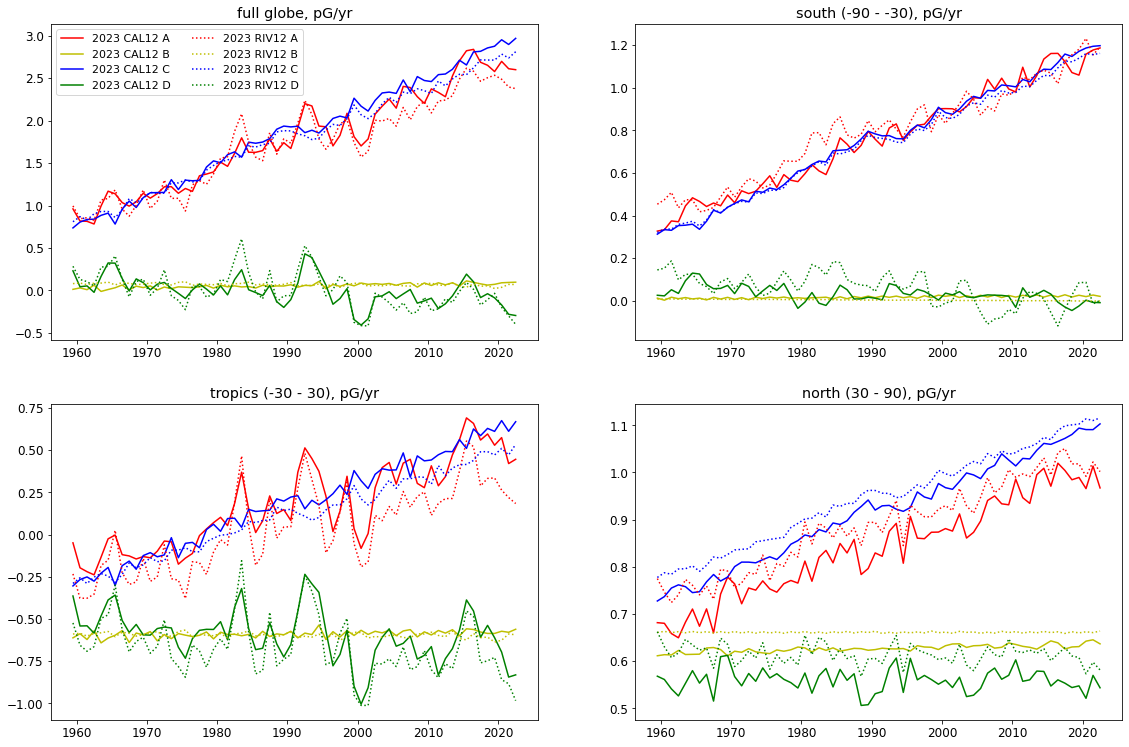

In [27]:
TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_A_*1959-2022*.nc')[0])
TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_B_*1959-2022*.nc')[0])
TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_C_*1959-2022*.nc')[0])
TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdirCAL}/integrated_timelines_PlankTOM_D_*1959-2022*.nc')[0])

TJ_tfil2_A = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_A_*1959-2022*.nc')[0])
TJ_tfil2_B = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_B_*1959-2022*.nc')[0])
TJ_tfil2_C = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_C_*1959-2022*.nc')[0])
TJ_tfil2_D = xr.open_dataset(glob.glob(f'{TJdirRIV}/integrated_timelines_PlankTOM_D_*1959-2022*.nc')[0])



fact = 1.6
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(TJ_tfil_A.TIME.groupby('TIME.year').mean(), TJ_tfil_A.fgco2_glob.groupby('TIME.year').mean(), color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[0].plot(TJ_tfil_B.TIME.groupby('TIME.year').mean(), TJ_tfil_B.fgco2_glob.groupby('TIME.year').mean(), color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[0].plot(TJ_tfil_C.TIME.groupby('TIME.year').mean(), TJ_tfil_C.fgco2_glob.groupby('TIME.year').mean(), color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[0].plot(TJ_tfil_D.TIME.groupby('TIME.year').mean(), TJ_tfil_D.fgco2_glob.groupby('TIME.year').mean(), color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[0].set_title('full globe, pG/yr')

axs[1].plot(TJ_tfil_A.TIME.groupby('TIME.year').mean(), TJ_tfil_A.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[1].plot(TJ_tfil_B.TIME.groupby('TIME.year').mean(), TJ_tfil_B.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[1].plot(TJ_tfil_C.TIME.groupby('TIME.year').mean(), TJ_tfil_C.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[1].plot(TJ_tfil_D.TIME.groupby('TIME.year').mean(), TJ_tfil_D.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[1].set_title('south (-90 - -30), pG/yr')

axs[2].plot(TJ_tfil_A.TIME.groupby('TIME.year').mean(), TJ_tfil_A.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[2].plot(TJ_tfil_B.TIME.groupby('TIME.year').mean(), TJ_tfil_B.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[2].plot(TJ_tfil_C.TIME.groupby('TIME.year').mean(), TJ_tfil_C.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[2].plot(TJ_tfil_D.TIME.groupby('TIME.year').mean(), TJ_tfil_D.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'g', label = '2023 CAL12 D', linestyle = '-')
axs[2].set_title('tropics (-30 - 30), pG/yr')

axs[3].plot(TJ_tfil_A.TIME.groupby('TIME.year').mean(), TJ_tfil_A.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'r', label = '2023 CAL12 A', linestyle = '-')
axs[3].plot(TJ_tfil_B.TIME.groupby('TIME.year').mean(), TJ_tfil_B.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'y', label = '2023 CAL12 B', linestyle = '-')
axs[3].plot(TJ_tfil_C.TIME.groupby('TIME.year').mean(), TJ_tfil_C.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'b', label = '2023 CAL12 C', linestyle = '-')
axs[3].plot(TJ_tfil_D.TIME.groupby('TIME.year').mean(), TJ_tfil_D.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'g', label = '2023 CAL12 D', linestyle = '-')


axs[3].set_title('north (30 - 90), pG/yr')

axs[0].plot(TJ_tfil2_A.TIME.groupby('TIME.year').mean(), TJ_tfil2_A.fgco2_glob.groupby('TIME.year').mean(), color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[0].plot(TJ_tfil2_B.TIME.groupby('TIME.year').mean(), TJ_tfil2_B.fgco2_glob.groupby('TIME.year').mean(), color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[0].plot(TJ_tfil2_C.TIME.groupby('TIME.year').mean(), TJ_tfil2_C.fgco2_glob.groupby('TIME.year').mean(), color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[0].plot(TJ_tfil2_D.TIME.groupby('TIME.year').mean(), TJ_tfil2_D.fgco2_glob.groupby('TIME.year').mean(), color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[0].set_title('full globe, pG/yr')

axs[1].plot(TJ_tfil2_A.TIME.groupby('TIME.year').mean(), TJ_tfil2_A.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[1].plot(TJ_tfil2_B.TIME.groupby('TIME.year').mean(), TJ_tfil2_B.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[1].plot(TJ_tfil2_C.TIME.groupby('TIME.year').mean(), TJ_tfil2_C.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[1].plot(TJ_tfil2_D.TIME.groupby('TIME.year').mean(), TJ_tfil2_D.fgco2_reg[:,0].groupby('TIME.year').mean(), color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[1].set_title('south (-90 - -30), pG/yr')

axs[2].plot(TJ_tfil2_A.TIME.groupby('TIME.year').mean(), TJ_tfil2_A.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[2].plot(TJ_tfil2_B.TIME.groupby('TIME.year').mean(), TJ_tfil2_B.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[2].plot(TJ_tfil2_C.TIME.groupby('TIME.year').mean(), TJ_tfil2_C.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[2].plot(TJ_tfil2_D.TIME.groupby('TIME.year').mean(), TJ_tfil2_D.fgco2_reg[:,1].groupby('TIME.year').mean(), color = 'g', label = '2023 RIV12 D', linestyle = ':')
axs[2].set_title('tropics (-30 - 30), pG/yr')

axs[3].plot(TJ_tfil2_A.TIME.groupby('TIME.year').mean(), TJ_tfil2_A.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'r', label = '2023 RIV12 A', linestyle = ':')
axs[3].plot(TJ_tfil2_B.TIME.groupby('TIME.year').mean(), TJ_tfil2_B.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'y', label = '2023 RIV12 B', linestyle = ':')
axs[3].plot(TJ_tfil2_C.TIME.groupby('TIME.year').mean(), TJ_tfil2_C.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'b', label = '2023 RIV12 C', linestyle = ':')
axs[3].plot(TJ_tfil2_D.TIME.groupby('TIME.year').mean(), TJ_tfil2_D.fgco2_reg[:,2].groupby('TIME.year').mean(), color = 'g', label = '2023 RIV12 D', linestyle = ':')



axs[0].legend(ncol = 2, loc = 'best', fontsize = 11)

In [32]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

CAL12_ptrc = xr.open_mfdataset(make_yearlist(2010,2020,'ptrc','TOM12_TJ_GEA1', '/gpfs/home/mep22dku/scratch/ModelRuns'))
RIV12_ptrc = xr.open_mfdataset(make_yearlist(2010,2020,'ptrc','TOM12_TJ_RVA0', '/gpfs/home/mep22dku/scratch/ModelRuns'))
TOM12_ptrc = xr.open_mfdataset(make_yearlist(2010,2020,'ptrc','TOM12_TJ_GEA0', '/gpfs/home/mep22dku/scratch/ModelRuns'))

CAL12_diad = xr.open_mfdataset(make_yearlist(2010,2020,'diad','TOM12_TJ_GEA1', '/gpfs/home/mep22dku/scratch/ModelRuns'))
RIV12_diad = xr.open_mfdataset(make_yearlist(2010,2020,'diad','TOM12_TJ_RVA0', '/gpfs/home/mep22dku/scratch/ModelRuns'))
TOM12_diad = xr.open_mfdataset(make_yearlist(2010,2020,'diad','TOM12_TJ_GEA0', '/gpfs/home/mep22dku/scratch/ModelRuns'))


In [47]:
w = CAL12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values

Text(0.5, 0.98, 'DIATOMS, top 40 m average, 2010-2020')

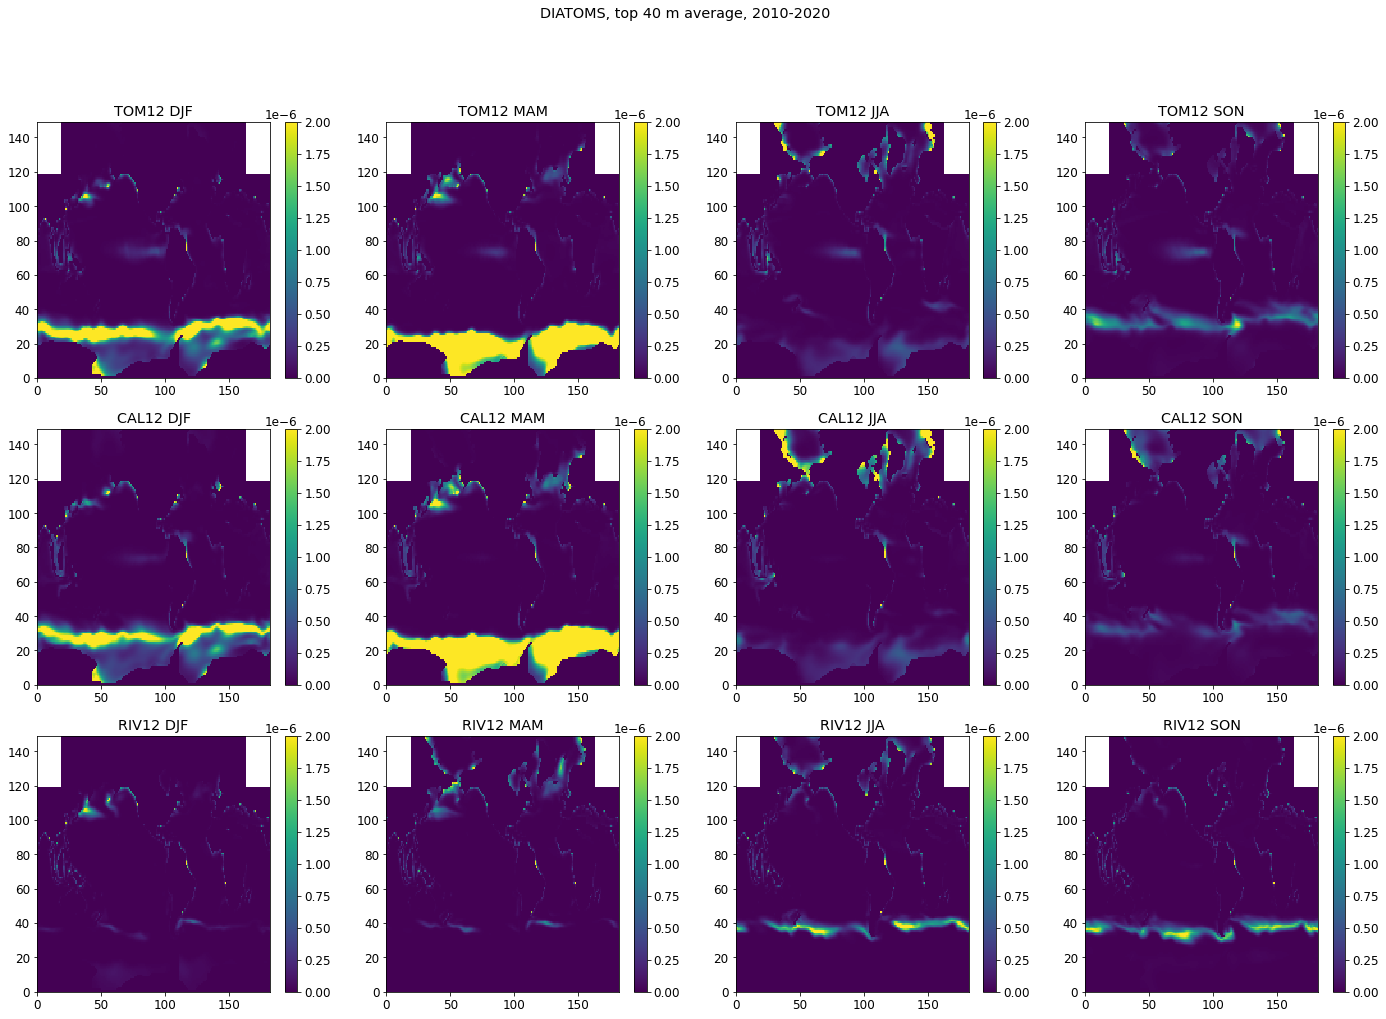

In [56]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 0; tvmax = 2e-6
axs = axs.ravel()
ind = 0
w = TOM12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_ptrc.DIA.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('DIATOMS, top 40 m average, 2010-2020')


Text(0.5, 0.98, 'COCOs, top 40 m average, 2010-2020')

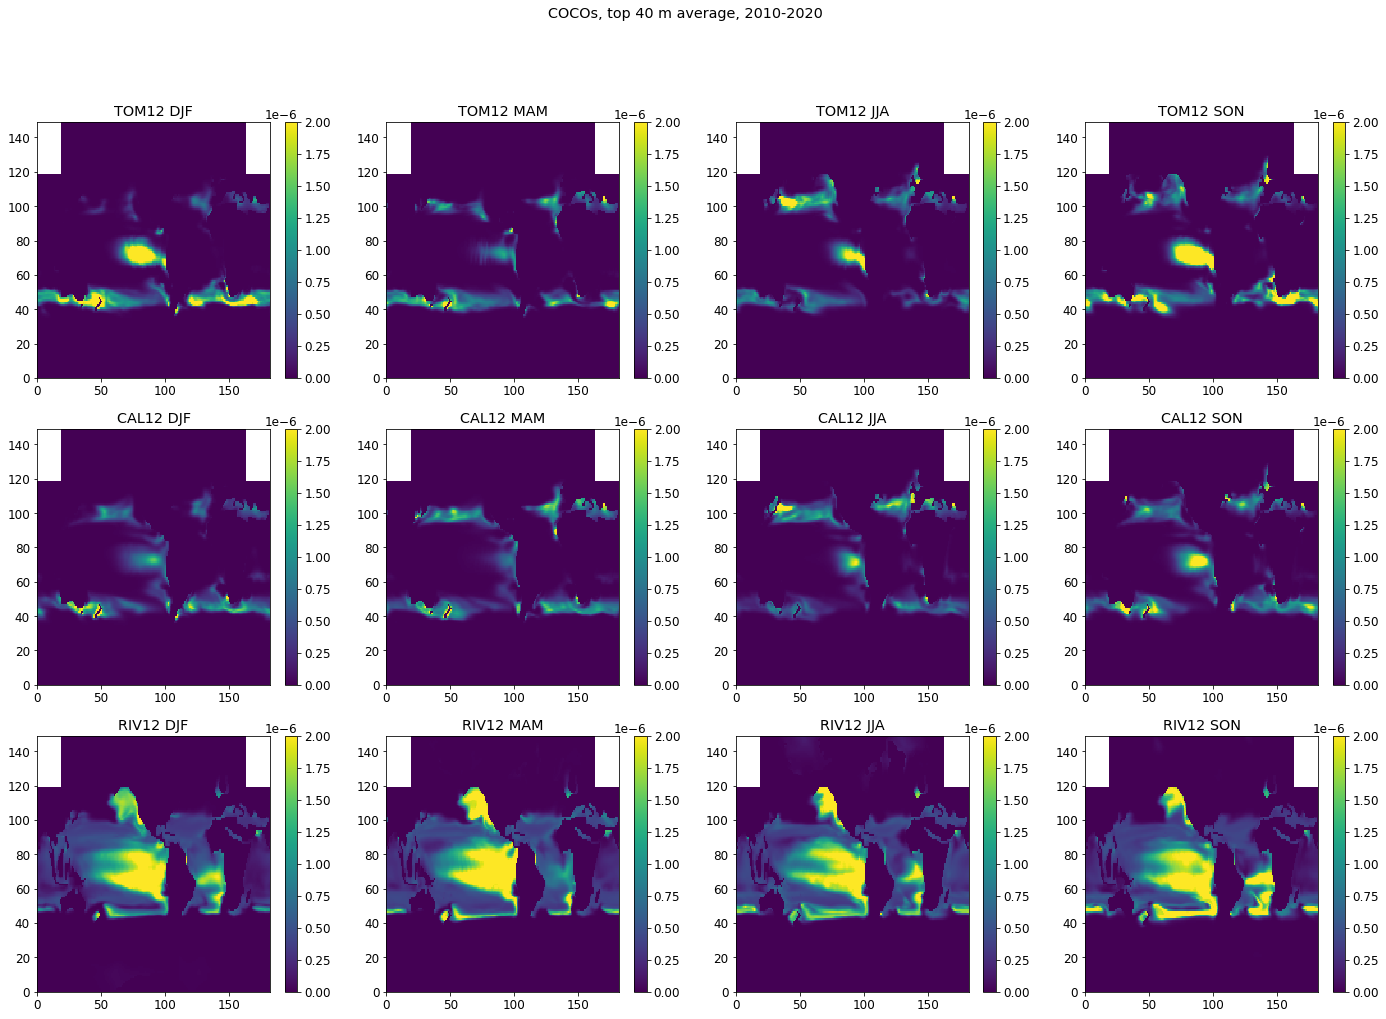

In [57]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 0; tvmax = 2e-6
axs = axs.ravel()
ind = 0
w = TOM12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_ptrc.COC.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('COCOs, top 40 m average, 2010-2020')



Text(0.5, 0.98, 'DIC, surface average, 2010-2020')

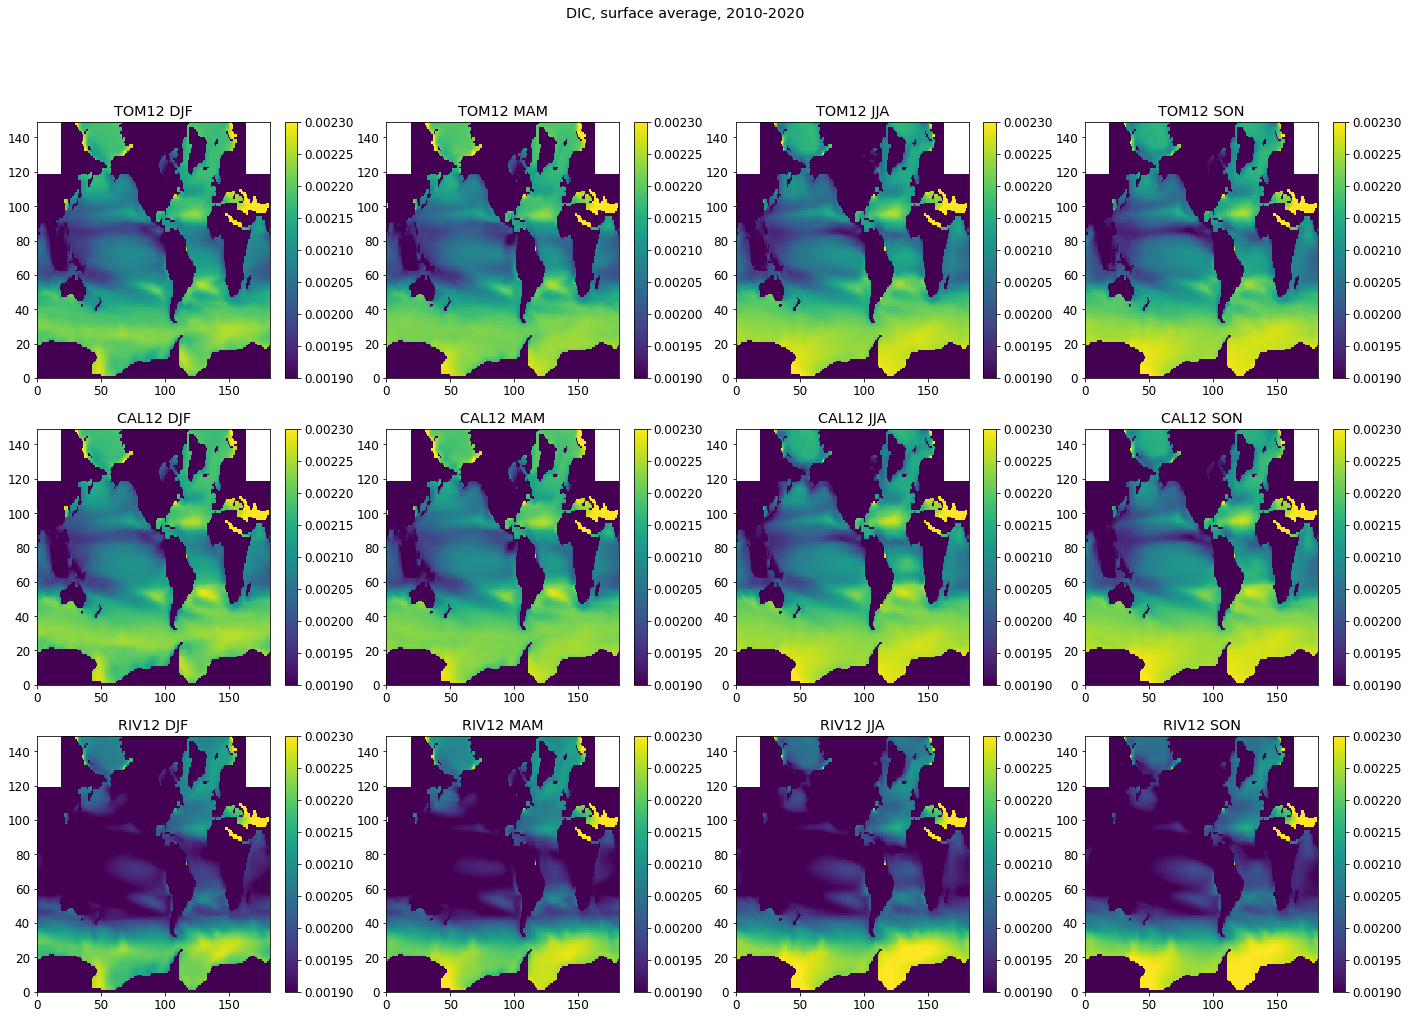

In [62]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 1.9e-3; tvmax = 2.3e-3
axs = axs.ravel()
ind = 0
w = TOM12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_ptrc.DIC.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('DIC, surface average, 2010-2020')




Text(0.5, 0.98, 'Alkalini, surface average, 2010-2020')

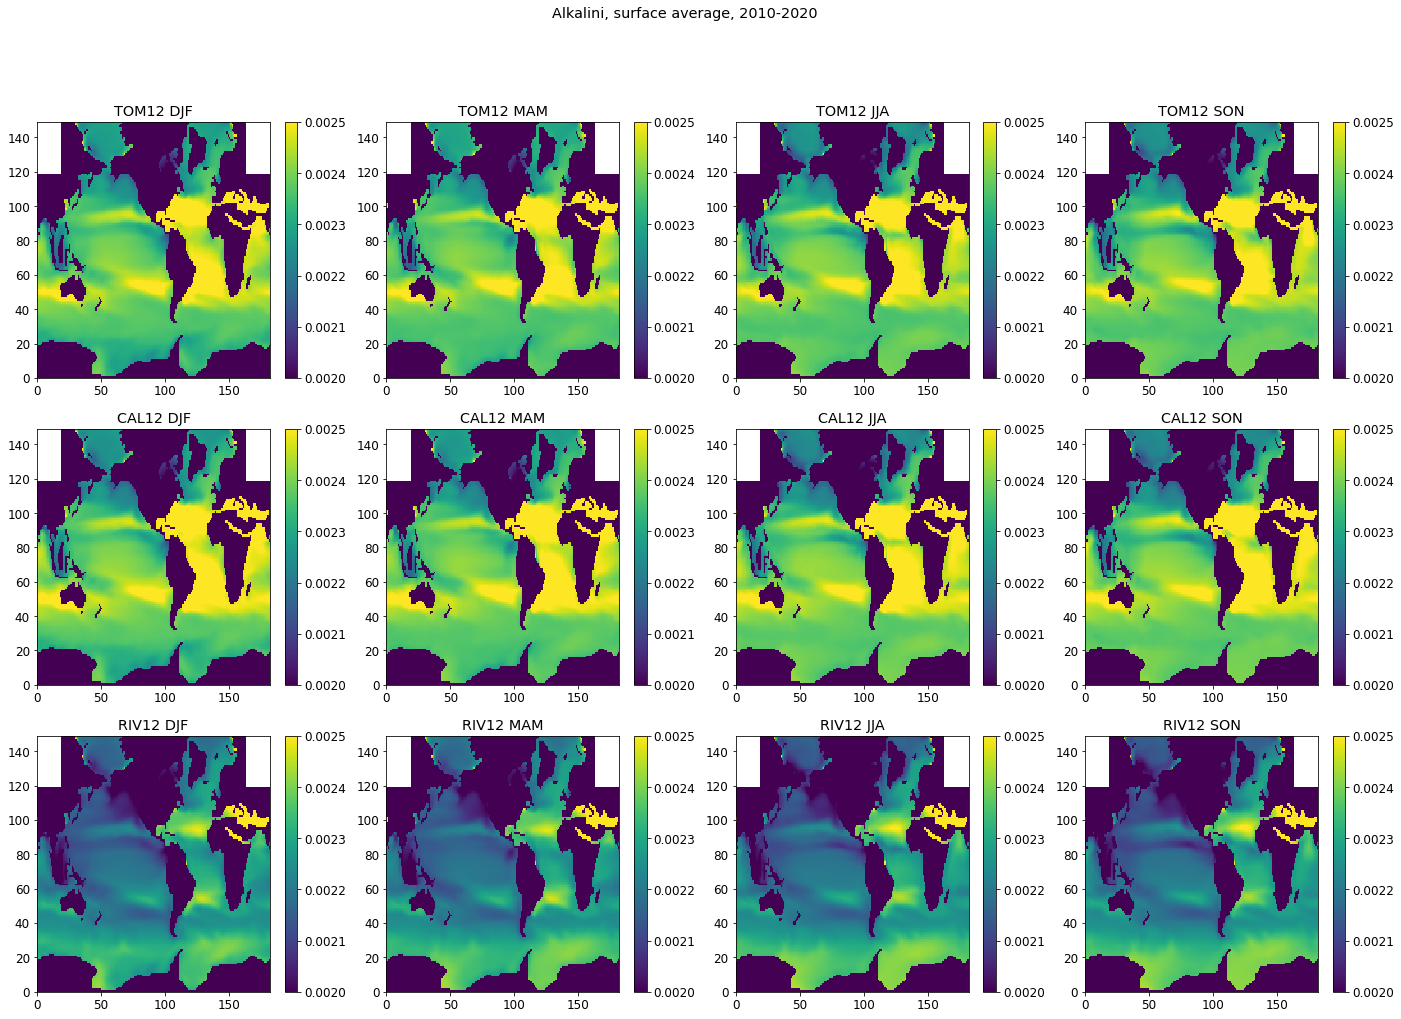

In [64]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 2.0e-3; tvmax = 2.5e-3
axs = axs.ravel()
ind = 0
w = TOM12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(TOM12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(CAL12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_ptrc.Alkalini.isel(deptht = slice(0,1)).sel(time_counter=(RIV12_ptrc['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('Alkalini, surface average, 2010-2020')





In [65]:
CAL12_diad

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 132, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2010-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMES                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMAC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPTDOC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPT                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    TChl                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Detrit                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Carniv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Herbiv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMICPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMESPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMACPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    nitrfix               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    denitr                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DELO2                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    vsink                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    sinksil               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    probsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    losbsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    remdsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    discarb               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpCO3                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpARA                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAGEL     

Text(0.5, 0.98, 'TChl, top 40 m average, 2010-2020')

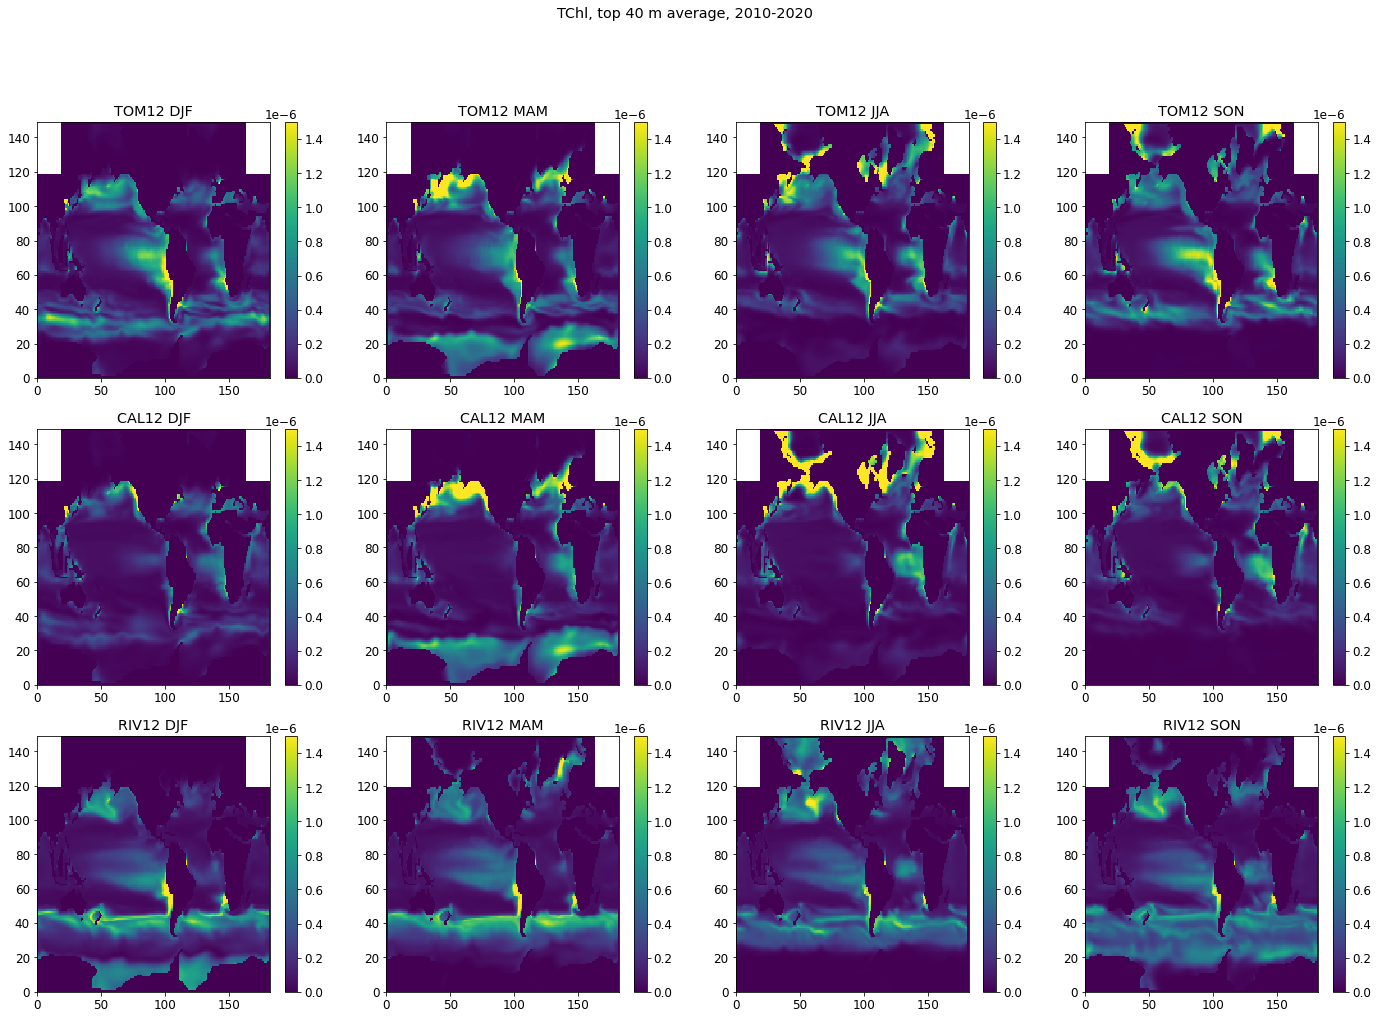

In [67]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 0; tvmax = 1.5e-6
axs = axs.ravel()
ind = 0
w = TOM12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(TOM12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(CAL12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter', 'deptht']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter', 'deptht']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter', 'deptht']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_diad.TChl.isel(deptht = slice(0,4)).sel(time_counter=(RIV12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter', 'deptht']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('TChl, top 40 m average, 2010-2020')




Text(0.5, 0.98, 'Cflx, top 40 m average, 2010-2020')

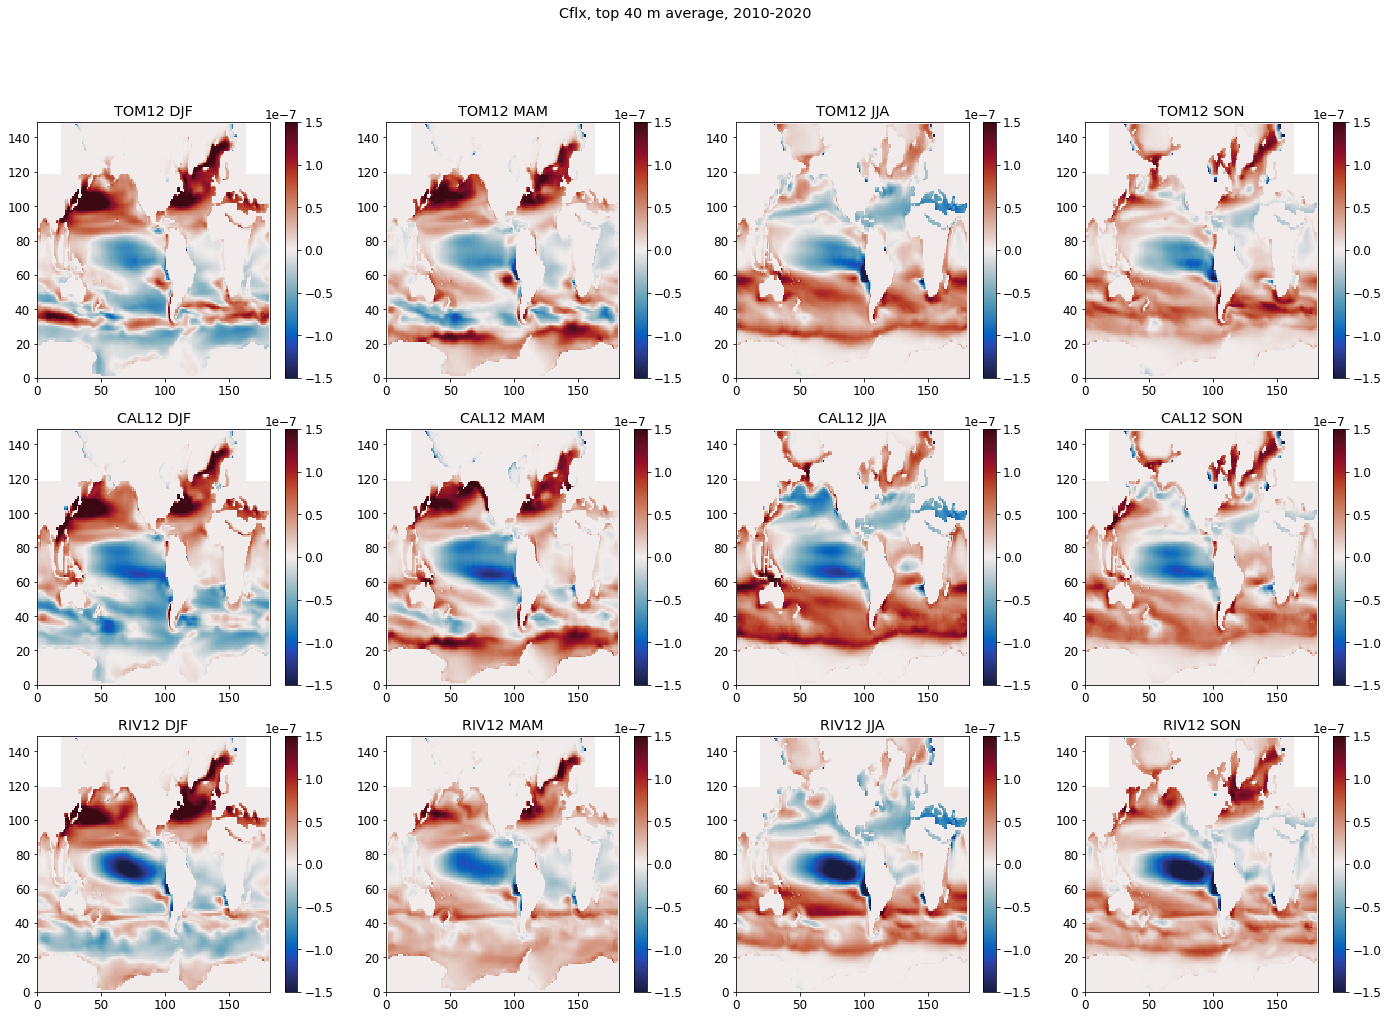

In [72]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = -1.5e-7; tvmax = 1.5e-7
axs = axs.ravel()
ind = 0
w = TOM12_diad.Cflx.sel(time_counter=(TOM12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_diad.Cflx.sel(time_counter=(TOM12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_diad.Cflx.sel(time_counter=(TOM12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_diad.Cflx.sel(time_counter=(TOM12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_diad.Cflx.sel(time_counter=(CAL12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_diad.Cflx.sel(time_counter=(CAL12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_diad.Cflx.sel(time_counter=(CAL12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_diad.Cflx.sel(time_counter=(CAL12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_diad.Cflx.sel(time_counter=(RIV12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_diad.Cflx.sel(time_counter=(RIV12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_diad.Cflx.sel(time_counter=(RIV12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_diad.Cflx.sel(time_counter=(RIV12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('Cflx, top 40 m average, 2010-2020')


Text(0.5, 0.98, 'pCO2, top 40 m average, 2010-2020')

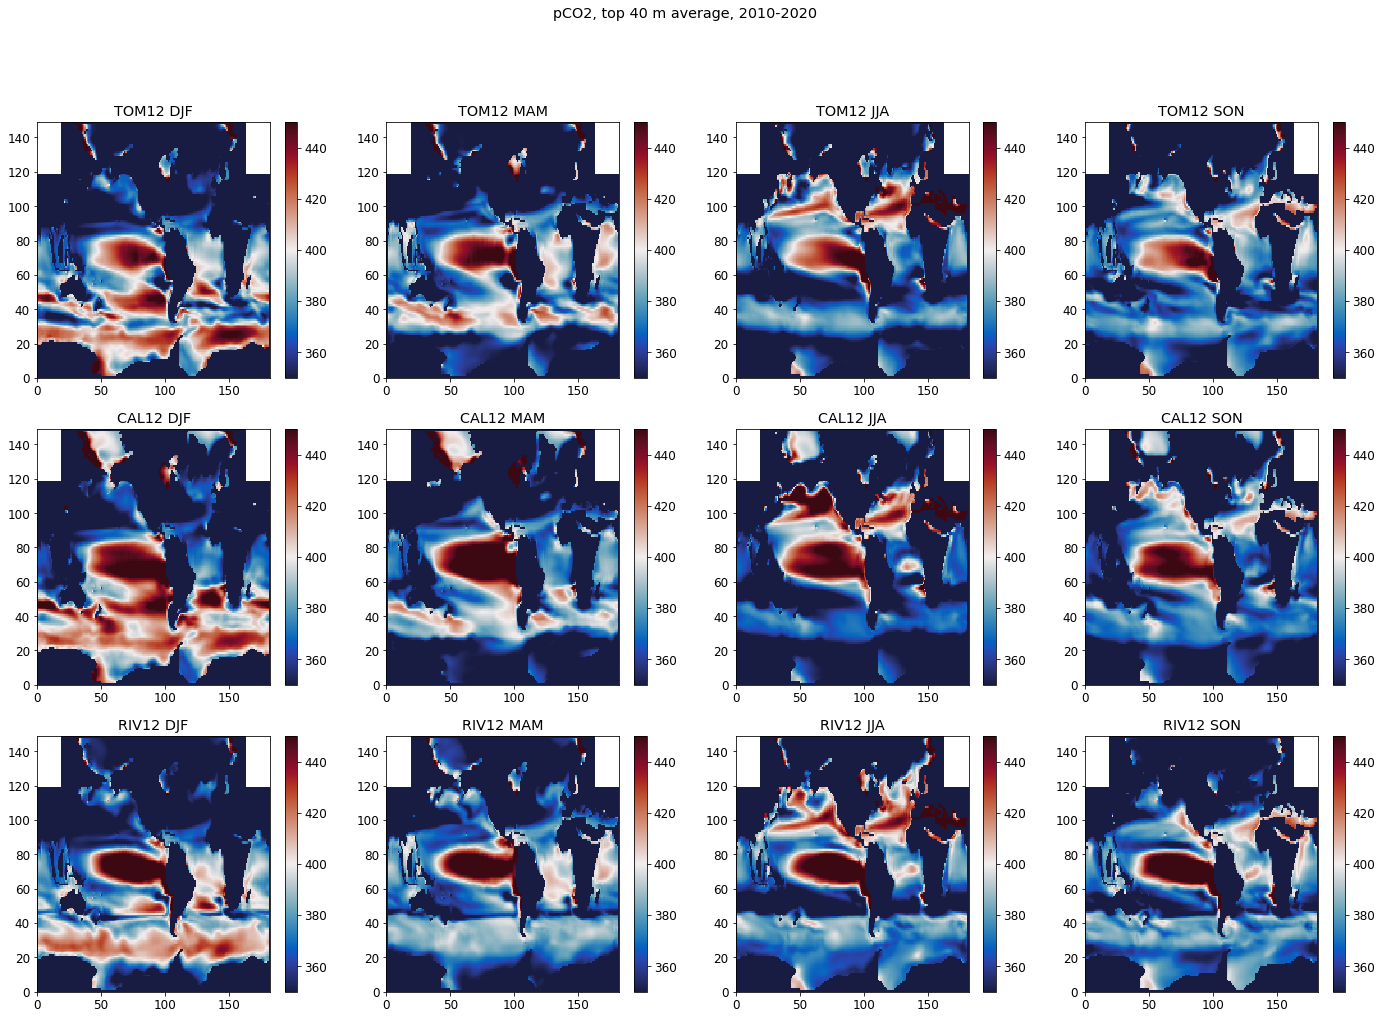

In [75]:
fact =2 
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

tvmin = 350; tvmax = 450
axs = axs.ravel()
ind = 0
w = TOM12_diad.pCO2.sel(time_counter=(TOM12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('TOM12 DJF')
w = TOM12_diad.pCO2.sel(time_counter=(TOM12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('TOM12 MAM')
w = TOM12_diad.pCO2.sel(time_counter=(TOM12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('TOM12 JJA')
w = TOM12_diad.pCO2.sel(time_counter=(TOM12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('TOM12 SON')



ind = 4
w = CAL12_diad.pCO2.sel(time_counter=(CAL12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('CAL12 DJF')
w = CAL12_diad.pCO2.sel(time_counter=(CAL12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('CAL12 MAM')
w = CAL12_diad.pCO2.sel(time_counter=(CAL12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('CAL12 JJA')
w = CAL12_diad.pCO2.sel(time_counter=(CAL12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('CAL12 SON')

ind = 8
w = RIV12_diad.pCO2.sel(time_counter=(RIV12_diad['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values
t = axs[0+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[0+ind])
axs[0+ind].set_title('RIV12 DJF')
w = RIV12_diad.pCO2.sel(time_counter=(RIV12_diad['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values
t = axs[1+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[1+ind])
axs[1+ind].set_title('RIV12 MAM')
w = RIV12_diad.pCO2.sel(time_counter=(RIV12_diad['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values
t = axs[2+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[2+ind])
axs[2+ind].set_title('RIV12 JJA')
w = RIV12_diad.pCO2.sel(time_counter=(RIV12_diad['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values
t = axs[3+ind].pcolormesh(w, vmin = tvmin, vmax = tvmax, cmap = cm.balance)
plt.colorbar(t, ax = axs[3+ind])
axs[3+ind].set_title('RIV12 SON')


plt.suptitle('pCO2, top 40 m average, 2010-2020')


